### 휴먼지능정보공학과 201910787 김영서



```Customer```, ```Order``` 컨트랙을 개발하고, 블록체인에서 주문 거래 프로그램을 작성하세요.

### ```Customer``` 컨트랙의 멤버 속성과 함수:

필요한 상태변수와 함수를 구성하고, 명칭과 입출력과 수식어도 의미있게 결정한다.

- 상태변수에는:

	- 고객ID, 이름, 전화번호, 주소

    - 계정주소에 대한 ```mapping``` 등 그 외 필요한 상태변수를 추가.

- 고객정보 입력 함수 addCustomer(uint _id, string memory _name, string memory _ph, string memory _home)

- 배송지 주소 조회 함수 getHomeAddress()

- 고객id 조회 함수 getId()



### ```Order``` 컨트랙의 멤버 속성과 함수:

필요한 상태변수와 함수를 구성하고, 명칭과 입출력과 수식어도 의미있게 결정한다.

주의 할 점은, ```Order``` 컨트랙을 통해 고객정보를 입력하거나 배송지를 조회하지 않을 수 있지만,

```Customer``` 컨트랙을 따로 배포해야 가능하다. 이 문제에서는 ```Customer``` 객체를 통해서 이들 함수를 호출한다(new Customer()).

주문을 삭제하는 기능은 구현하지 않는다.

- 상태변수에는:

	- 주문ID, 상품명, 개수, 금액, 시간, 상태, 배송지

	- 계정주소에 대한 ```mapping``` 등 그 외 필요한 상태변수를 추가.

- 주문 함수 placeOrder (uint _id, string memory _p, uint _n, uint _amount)

	- 주문을 받으면 상태는 "Ordered"로, 시간은 현재시간으로 설정한다.

	- 주문 금액은 컨트랙에게 입금이 필요하다.

	- bidirectional map을 설정하여, 주문ID를 통하여 주문자 주소키를 알 수 있도록 힌다.

- 고객정보 입력 함수 addCustomer(uint _id, string memory _name, string memory _ph, string memory _home)

	- ```Customer``` 컨트랙을 통해 설정

- 배송지 주소 조회 함수 getHomeAddress(). ```Customer``` 컨트랙을 통해 조회

- 주문처리 상황 조회 함수 getStatus() 주문처리 상황 조회 함수

- 주문처리 상황 갱신 함수 updateStatus(uint _id, string memory _s)

- 주문내역 출력 함수 getOrderItem(): 주문했던 고객의 계정에 해당하는 주문ID, 상품명, 상태, 배송지 출력

- 주문ID로 주문내역 조회 함수 getOrderById(uint _id) : 주문ID를 입력하면 주문ID, 상품명, 상태, 배송지 출력

- 주문 갯수 조회 함수 getNOrder()

- 주문 총액 조회 함수 getTotalOrderAmount()

- 컨트랙 잔고 확인 함수 queryBalance()

- 관리자인지 제한하는 함수 isOwner()

- 그 외 필요한 함수를 추가할 수 있다.



아래 문항별 10점씩 배점된다.

1~2는 REMIX에서 실행하고, 해당 화면캡쳐를 제출,

3~8은 ganache@8345에서 노드로 실행

9~10은 geth@8445에서 노드로 실행 (노드 단말에서 실행하면 해당 화면 제출)



### 1) REMIX Customer 화면

Customer의 addCustomer, getHomeAddress, getId 등 기능버튼 결과 보이도록 화면캡쳐 제출.



### 2) REMIX Order 화면

Order 버튼 결과 모두 출력, 특히 placeOrder할 때, 오른쪽 단말창이 열려서 녹색표시가 나오도록 화면캡쳐 제출.

REMIX에서 테스트하면서 콘솔 창에서 출력되는 필요한 gas를 확인하자. 



### 3) 계정, 잔고, gas 출력

온라인 주문에서는 많은 주문자가 있을 수 있다는 점에서 계정1, 계정2, 계정3 사용한다. 계정이 없으면 3개를 만들어 놓는다.

계정1, 계정2, 계정3과 각 잔고를 출력한다. 현재의 블록번호도 출력한다. 

```Order``` 컨트랙 생성에 필요한 gas 출력. ```Order``` 컨트랙은 바이트코드량과 그 기능이 많아 배포하기 위해서는 gas가 상당히 필요하다.



### 4) 고객정보 3건 입력

* 계정1을 사용하여 고객정보 입력 -> 111, "kim", "010-2017-1111", "111 hongji-dong jongro-gu seoul"

* 계정2를 사용하여 고객정보 입력 -> 112, "lee", "010-2017-1112", "112 hongji-dong jongro-gu seoul"

* 계정3을 사용하여 고객정보 입력 -> 113, "lim", "010-2017-1113", "113 hongji-dong jongro-gu seoul"

* 아래 ```tx.origin```와 ```msg.sender``` 관련 주의를 참조해서 ```msg.sender``` 대신 ```tx.orgin```을 사용하자.



### 5) 모든 고객의 배송지 출력

* 계정1을 사용하여 고객배송지 출력, "111 hongji-dong jongro-gu seoul"

* 계정2를 사용하여 고객배송지 출력, "112 hongji-dong jongro-gu seoul"

* 계정3을 사용하여 고객배송지 출력, "113 hongji-dong jongro-gu seoul"

* 고객배송지를 출력할 때, ```call({from: accounts[1]})```과 같이 해당 계정주소를 적어주고 호출한다.



### 6) 주문

* 주문하면서, 주문상태를 "Ordered"로 설정하고, 주문시간을 지금으로 설정한다.

* 계정1에서 주문내역 입력 -> 555, "T-Shirt", 2, 1115

* 계정2에서 주문내역 입력 -> 556, "T-Shirt", 3, 1116

* 계정3에서 주문내역 입력 -> 557, "T-Shirt", 4, 1117



### 7) 주문개수, 주문금액 합계 및 잔고 출력

* 주문입력을 잘 했으면, 주문개수 3건, 주문금액 합계 3348, 컨트랙잔고를 출력한다. 잘 풀었으면 컨트랙잔고는 주문총액과 동일하다.

* 주문ID 556으로 주문내역 출력. 계정을 입력해서 출력하지 않는다. -> 556, "T-Shirt", "On delivery", "112 hongji-dong jongro-gu seoul"



### 8) 모든 고객의 주문 내역 출력

556번 주문배송중 갱신해서 출력, 관리자만 할 수 있게 제한한다.

* 계정1에서 주문내역 출력 -> 555, "T-Shirt", "Ordered", "111 hongji-dong jongro-gu seoul"

* 계정2에서 주문내역 출력 -> 556, "T-Shirt", "On delivery", "112 hongji-dong jongro-gu seoul"

* 계정3에서 주문내역 출력 -> 557, "T-Shirt", "Ordered", "113 hongji-dong jongro-gu seoul"



### 9) geth@8445에서 배포하고, 고객정보 입력

* 계정1을 사용하여 고객정보 입력 -> 111, "kim", "010-2017-1111", "111 hongji-dong jongro-gu seoul"



### 10) geth@8445에서 앞 문항 9)에 이어서 실행

* 계정1에서 주문내역 입력 -> 555, "T-Shirt", 2, 1115

* 주문ID 555으로 주문내역 출력 -> 555, "T-Shirt", "Ordered", "111 hongji-dong jongro-gu seoul"



In [109]:
%%writefile src/CustomerOrder.sol
pragma solidity 0.6.4;

contract Customer {
    struct CustomerInfo {
        uint id;
        string name;
        string phoneNum;
        string destination;
        bool isCustomer;
    }
    mapping (address => CustomerInfo) customerMap;
    mapping (address => CustomerInfo) customerId;
    function addCustomer(address addr, uint _id, string memory _name, string memory _ph, string memory _home) public {
        if (customerMap[addr].isCustomer == false) {
            CustomerInfo memory c = CustomerInfo(_id, _name, _ph, _home, true);
            customerMap[addr] = c;
            customerId[addr] = c;
        }
    }
    function getHomeAddress(address addr) view public returns (string memory) {
        CustomerInfo memory c = customerMap[addr];
        return c.destination;
    }
    function getId(address addr) view public returns (uint) {
        CustomerInfo memory c = customerMap[addr];
        return c.id;
    }
}

contract Order {
    address payable owner;
    Customer customer;
    constructor() public { 
        customer = new Customer();
        owner = msg.sender;
    }
    struct OrderInfo {
        uint oid;
        string oname;
        uint256 timestamp;
    }
    mapping (address => OrderInfo) orderMap;
    mapping (uint => address) addressById;
    mapping (address => string) orderStatus;
    mapping (address => uint) orderQuantity;
    mapping (address => uint) orderAmount;
    mapping (address => bool) isOrdered;
    uint accAmount;
    uint accOrderNum;
    function placeOrder(address payable addr, uint _oid, string memory _oname, uint _n, uint _amount) public payable {
        OrderInfo memory o = OrderInfo(_oid, _oname, now);
        orderMap[addr] = o;
        addressById[_oid] = addr;
        orderStatus[addr] = "Ordered";
        orderQuantity[addr] =_n;
        orderAmount[addr] = _amount;
        isOrdered[addr] = true;
        accAmount += _amount;
        accOrderNum ++;
    }
    function addCustomer(address addr, uint _id, string memory _name, string memory _ph, string memory _home) public {
        customer.addCustomer(addr, _id, _name, _ph, _home);
    }
    function getHomeAddress(address _addr) public view returns(string memory) {
        return customer.getHomeAddress(_addr);
    }
    function getStatus(address _addr) public view returns(string memory) {
       // OrderInfo memory o = orderMap[_addr];
        return orderStatus[_addr];
    }
    function updateStatus(uint _id, string memory _s) public {
        orderStatus[addressById[_id]] = _s;
    }
    function getOrderItem(address _addr) view public returns (uint, string memory, string memory, string memory) {
        OrderInfo memory o = orderMap[_addr];
        return (o.oid, o.oname, orderStatus[_addr], customer.getHomeAddress(_addr));
    }
    function getOrderById(uint _id) view public returns (uint, string memory, string memory, string memory) {
        OrderInfo memory order = orderMap[addressById[_id]];
        return (order.oid, order.oname, orderStatus[addressById[_id]], customer.getHomeAddress(addressById[_id]));
    }
    function getNOrder() public view returns (uint) {
        return accOrderNum;
    }
    function getTotalOrderAmount() public view returns (uint) {
        return accAmount;
    }
    function queryBalance() public view returns (uint) {
        return address(this).balance;
    }
    modifier isOwner() {
        require(msg.sender == owner);
        _;
    }
}

Overwriting src/CustomerOrder.sol


In [110]:
!solc src/CustomerOrder.sol --combined-json abi,bin > src/CustomerOrder.json

## 문제 1의 답: REMIX Customer 화면

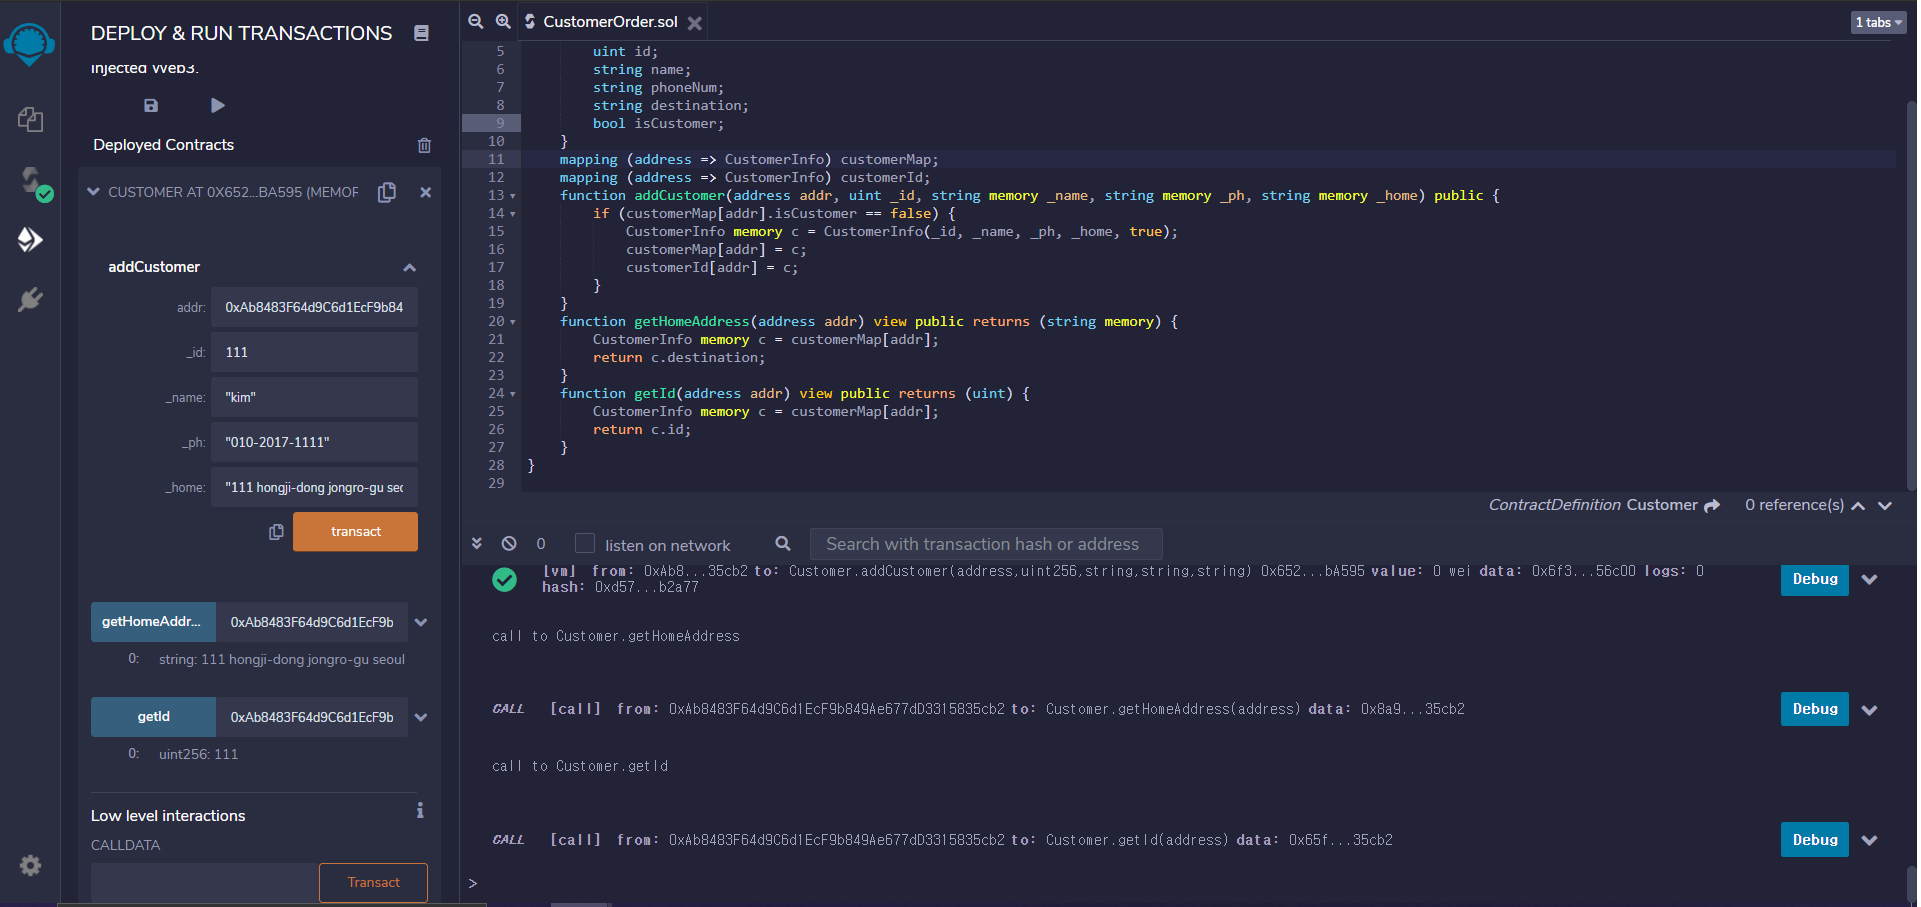

In [60]:
from IPython.display import Image
Image("remix_1.PNG")

## 문제 2의 답: REMIX Order 화면

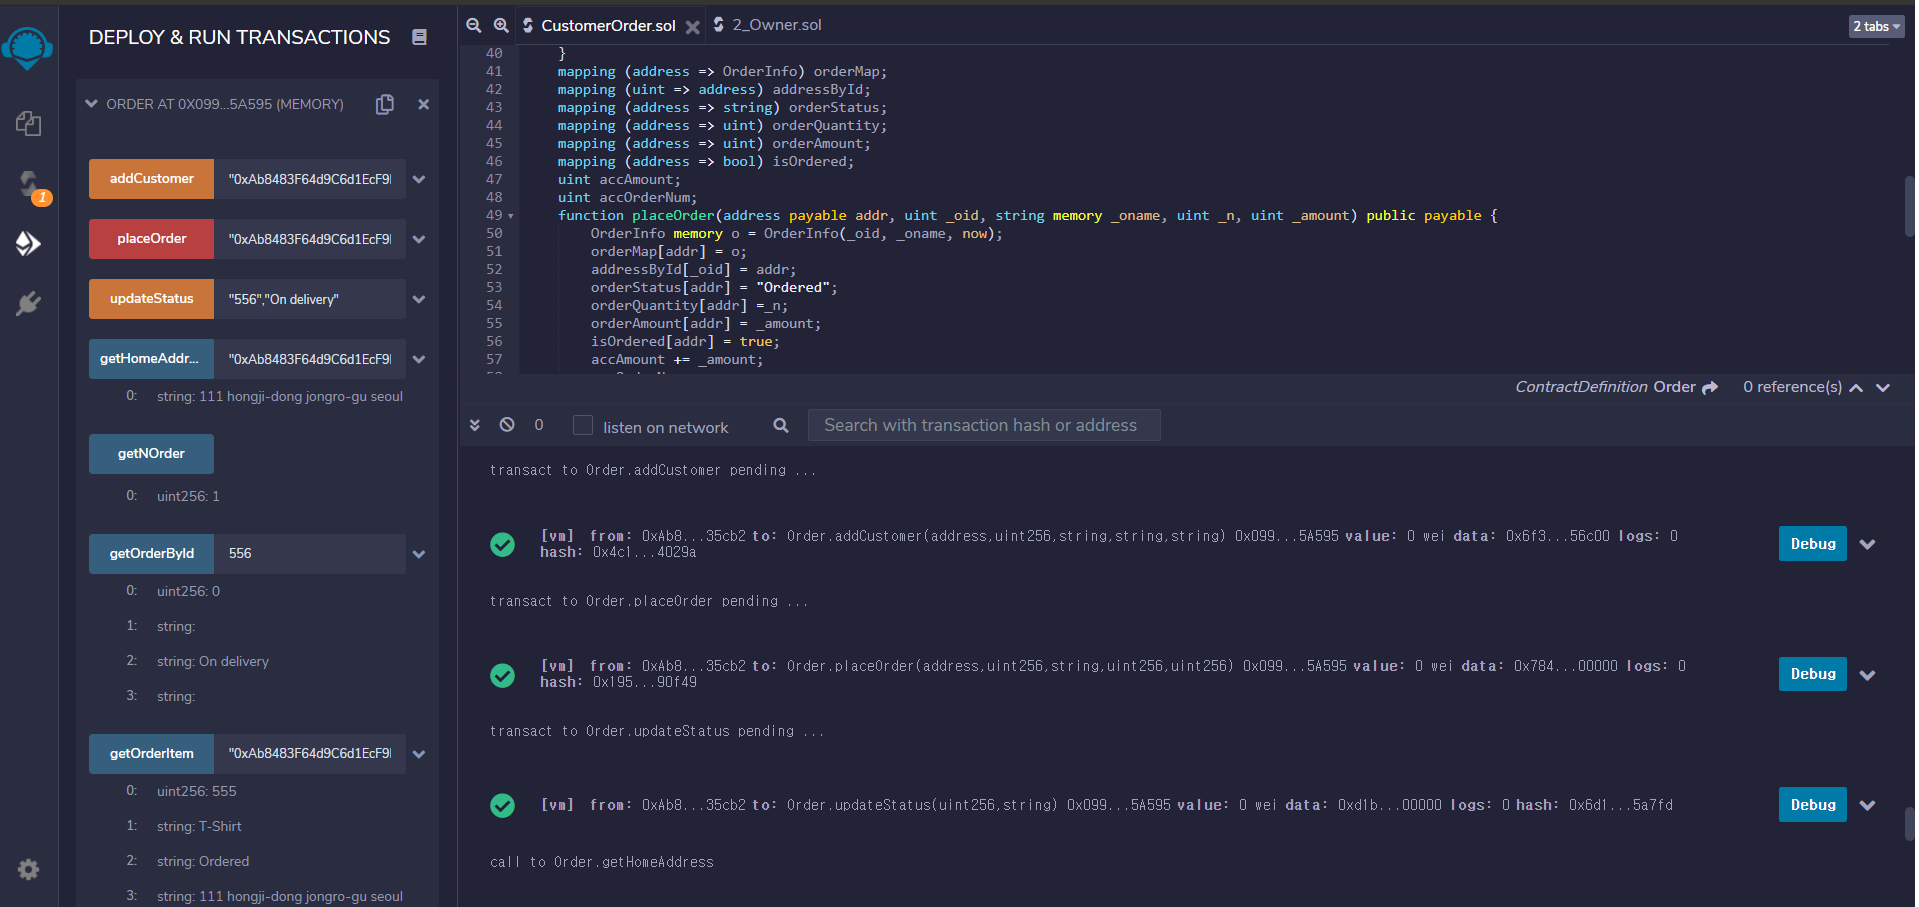

In [61]:
Image("remix_2-1.PNG")

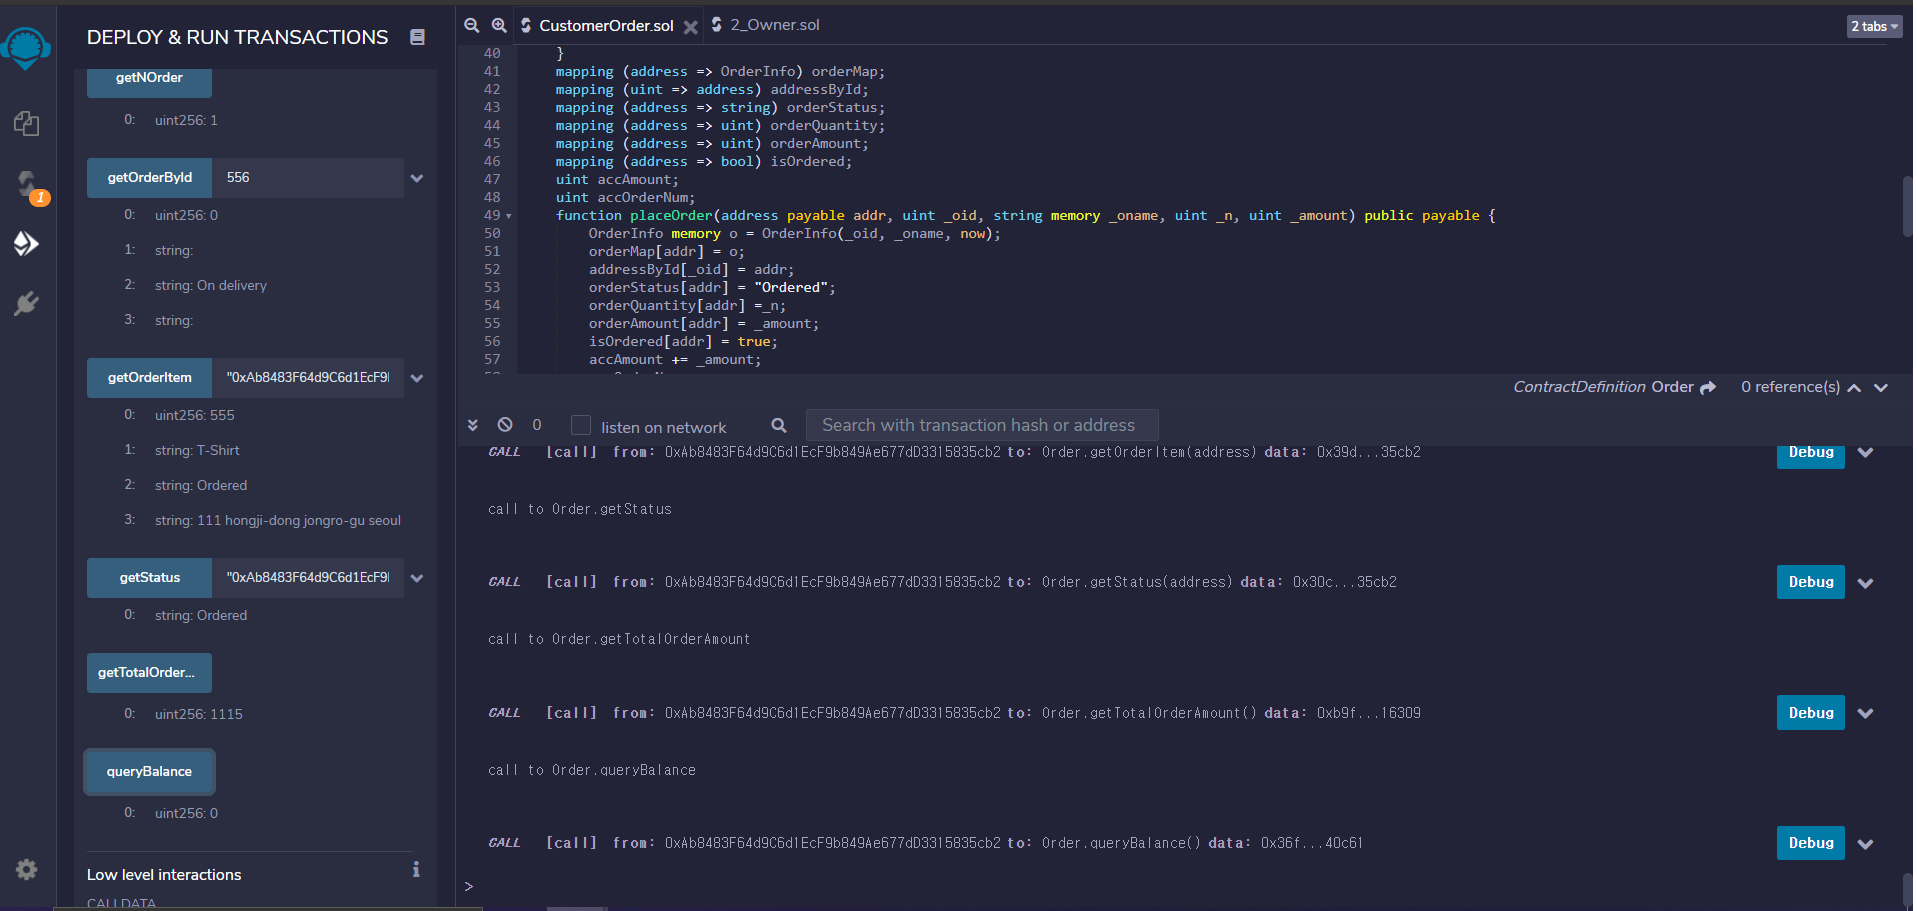

In [62]:
Image("remix_2-2.PNG")

## 문제 3의 답: gas 출력

In [111]:
%%writefile src/CustomerOrderDeploy.js
var Web3=require('web3');
var web3=new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));
var fs=require('fs');
var _str = fs.readFileSync("src/CustomerOrder.json");
var _json=JSON.parse(_str)
var _abiArray=JSON.parse(_json.contracts["src/CustomerOrder.sol:Order"].abi);
var _bin="0x"+_json.contracts["src/CustomerOrder.sol:Order"].bin;

async function deploy() {
    const accounts = await web3.eth.getAccounts();
    console.log("Deploying the contract from " + accounts[0]);
    var deployed = await new web3.eth.Contract(_abiArray)
        .deploy({data: _bin})
        .send({from: accounts[0], gas: 3000000})
        .on('transactionHash', function(hash){
            console.log(">>> transactionHash"+hash);
        })
        .on('receipt', function(receipt){
            console.log(">>> RECEPIT hash: " + receipt.transactionHash + "\n>>> address:" + receipt.contractAddress);
        })
        .on('error', function(error, receipt) {
            console.log(">>> ERROR "+error);
        });
    console.log("---> The contract deployed to: " + deployed.options.address)
    new web3.eth.Contract(_abiArray).deploy({data: _bin}).estimateGas(function(err, gas) {
        if(!err) console.log("\nGas: "+ gas);
    });
}
deploy()

Overwriting src/CustomerOrderDeploy.js


In [112]:
!node src/CustomerOrderDeploy.js

Deploying the contract from 0x08E4B5F73E7224E66BFA873198047d8A6A75BC8f
>>> transactionHash0x5d411e84eb0940ccd29ee6e6a3e5376ced71b279be06b38770ae3564afe77a75
>>> RECEPIT hash: 0x5d411e84eb0940ccd29ee6e6a3e5376ced71b279be06b38770ae3564afe77a75
>>> address:0x7E59431B0984F5695a21A9968590073BE89B69c7
---> The contract deployed to: 0x7E59431B0984F5695a21A9968590073BE89B69c7

Gas: 2246834


## 문제 3의 답: 계정, 잔고 출력

In [113]:
%%writefile src/CustomerOrderUse_3.js
var Web3=require('web3');
var web3=new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));
var fs=require('fs');
var _str = fs.readFileSync("src/CustomerOrder.json");
var _json=JSON.parse(_str)
var _abiArray=JSON.parse(_json.contracts["src/CustomerOrder.sol:Order"].abi);

var order = new web3.eth.Contract(_abiArray, "0x7E59431B0984F5695a21A9968590073BE89B69c7");

async function doIt() {
    const accounts = await web3.eth.getAccounts();
    console.log("Account1: " + accounts[0]);
    const balanceAcc1 = await web3.eth.getBalance(accounts[0]);
    console.log("Balance of Account1: " + balanceAcc1);
    console.log("\n");
    console.log("Account2: " + accounts[1]);
    const balanceAcc2 = await web3.eth.getBalance(accounts[1]);
    console.log("Balance of Account2: " + balanceAcc2);
    console.log("\n");
    console.log("Account3: " + accounts[2]);
    const balanceAcc3 = await web3.eth.getBalance(accounts[2]);
    console.log("Balance of Account3: " + balanceAcc3);
    console.log("\n");
    console.log("Block number: " + web3.eth.getBlockNumber().then(console.log));
}

doIt()

Overwriting src/CustomerOrderUse_3.js


In [114]:
!node src/CustomerOrderUse_3.js

Account1: 0x08E4B5F73E7224E66BFA873198047d8A6A75BC8f
Balance of Account1: 99570973919999983275


Account2: 0x6346Eb3c7c8a6c69d5d0446160e3b1F8c4a70B6C
Balance of Account2: 99976769119999987724


Account3: 0x6a50Cb1A0d67e99d917886167789C7EE7Fdc3C16
Balance of Account3: 99976769119999987713


Block number: [object Promise]
59


## 문제 4의 답: 고객정보 3건 입력

In [115]:
%%writefile src/CustomerOrderUse_4.js
var Web3=require('web3');
var web3=new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));
var fs=require('fs');
var _str = fs.readFileSync("src/CustomerOrder.json");
var _json=JSON.parse(_str)
var _abiArray=JSON.parse(_json.contracts["src/CustomerOrder.sol:Order"].abi);

var order = new web3.eth.Contract(_abiArray, "0x7E59431B0984F5695a21A9968590073BE89B69c7");

async function doIt() {
    const accounts = await web3.eth.getAccounts();
    await order.methods.addCustomer(accounts[0], 111, "kim", "010-2017-1111", "111 hongji-dong jongro-gu seoul").send({from:accounts[3],gas:5000000});
    await order.methods.addCustomer(accounts[1], 112, "lee", "010-2017-1112", "112 hongji-dong jongro-gu seoul").send({from:accounts[3],gas:5000000});
    await order.methods.addCustomer(accounts[2], 113, "lim", "010-2017-1113", "113 hongji-dong jongro-gu seoul").send({from:accounts[3],gas:5000000});
}

doIt()

Overwriting src/CustomerOrderUse_4.js


In [116]:
!node src/CustomerOrderUse_4.js

## 문제 5의 답: 모든 고객의 배송지 출력

In [117]:
%%writefile src/CustomerOrderUse_5.js
var Web3=require('web3');
var web3=new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));
var fs=require('fs');
var _str = fs.readFileSync("src/CustomerOrder.json");
var _json=JSON.parse(_str)
var _abiArray=JSON.parse(_json.contracts["src/CustomerOrder.sol:Order"].abi);

var order = new web3.eth.Contract(_abiArray, "0x7E59431B0984F5695a21A9968590073BE89B69c7");

async function doIt() {
    const accounts = await web3.eth.getAccounts();
    order.methods.getHomeAddress(accounts[0]).call().then(function(value){console.log(value);});
    order.methods.getHomeAddress(accounts[1]).call().then(function(value){console.log(value);});
    order.methods.getHomeAddress(accounts[2]).call().then(function(value){console.log(value);});
}

doIt()

Overwriting src/CustomerOrderUse_5.js


In [118]:
!node src/CustomerOrderUse_5.js

111 hongji-dong jongro-gu seoul
112 hongji-dong jongro-gu seoul
113 hongji-dong jongro-gu seoul


## 문제 6의 답: 주문 <br> 문제 7의 답: 주문개수, 주문금액 합계 및 잔고 출력

In [119]:
%%writefile src/CustomerOrderUse_67.js
var Web3=require('web3');
var web3=new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));
var fs=require('fs');
var _str = fs.readFileSync("src/CustomerOrder.json");
var _json=JSON.parse(_str)
var _abiArray=JSON.parse(_json.contracts["src/CustomerOrder.sol:Order"].abi);

var order = new web3.eth.Contract(_abiArray, "0x7E59431B0984F5695a21A9968590073BE89B69c7");

async function doIt() {
    const accounts = await web3.eth.getAccounts();
    await order.methods.placeOrder(accounts[0], 555, "T-Shirt", 2, 1115).send({from:accounts[0],value:1115,gas:5000000});
    await order.methods.placeOrder(accounts[1], 556, "T-Shirt", 3, 1116).send({from:accounts[1],value:1116,gas:5000000});
    await order.methods.placeOrder(accounts[2], 557, "T-Shirt", 4, 1117).send({from:accounts[2],value:1117,gas:5000000});
    order.methods.getNOrder().call().then(function(value) {console.log("Number of Order:",value);});  
    order.methods.getTotalOrderAmount().call().then(function(value) {console.log("Total Amount:",value);});
    order.methods.queryBalance().call().then(function(value) {console.log("Contract balance:",value);});
    //order.methods.updateStatus(556, "On delivery").call().then(function(value) {console.log(value[0],value[1]);});
    order.methods.getOrderById(556).call().then(function(value){console.log(value);});
}

doIt()

Overwriting src/CustomerOrderUse_67.js


In [120]:
!node src/CustomerOrderUse_67.js

Number of Order: 3
Total Amount: 3348
Contract balance: 3348
Result {
  '0': '556',
  '1': 'T-Shirt',
  '2': 'Ordered',
  '3': '112 hongji-dong jongro-gu seoul'
}


##  문제 8의 답: 모든 고객의 주문 내역 출력

In [121]:
%%writefile src/CustomerOrderUse_8.js
var Web3=require('web3');
var web3=new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));
var fs=require('fs');
var _str = fs.readFileSync("src/CustomerOrder.json");
var _json=JSON.parse(_str)
var _abiArray=JSON.parse(_json.contracts["src/CustomerOrder.sol:Order"].abi);

var order = new web3.eth.Contract(_abiArray, "0x7E59431B0984F5695a21A9968590073BE89B69c7");

async function doIt() {
    const accounts = await web3.eth.getAccounts();
    order.methods.getOrderItem(accounts[0]).call().then(function(value){console.log("Order ID:",value[0],"\nProduct:",value[1],"\nStatus:",value[2],"\nShipping addr:",value[3]);});
    order.methods.getOrderItem(accounts[1]).call().then(function(value){console.log("\n\nOrder ID:",value[0],"\nProduct:",value[1],"\nStatus:",value[2],"\nShipping addr:",value[3]);});
    order.methods.getOrderItem(accounts[2]).call().then(function(value){console.log("\n\nOrder ID:",value[0],"\nProduct:",value[1],"\nStatus:",value[2],"\nShipping addr:",value[3]);});
}

doIt()

Overwriting src/CustomerOrderUse_8.js


In [122]:
!node src/CustomerOrderUse_8.js

Order ID: 555 
Product: T-Shirt 
Status: Ordered 
Shipping addr: 111 hongji-dong jongro-gu seoul


Order ID: 556 
Product: T-Shirt 
Status: Ordered 
Shipping addr: 112 hongji-dong jongro-gu seoul


Order ID: 557 
Product: T-Shirt 
Status: Ordered 
Shipping addr: 113 hongji-dong jongro-gu seoul


## 문제 9의 답: geth@8445에서 배포하고, 고객정보 입력

In [35]:
%%writefile src/CustomerOrderDeploy_geth.js
var Web3=require('web3');
var web3=new Web3(new Web3.providers.HttpProvider("http://localhost:8445"));
var fs=require('fs');
var _str = fs.readFileSync("src/CustomerOrder_geth.json");
var _json=JSON.parse(_str)
var _abiArray=JSON.parse(_json.contracts["src/CustomerOrder_geth.sol:Order"].abi);
var _bin="0x"+_json.contracts["src/CustomerOrder_geth.sol:Order"].bin;

async function deploy() {
    const accounts = await web3.eth.getAccounts();
    console.log("Deploying the contract from " + accounts[0]);
    var deployed = await new web3.eth.Contract(_abiArray)
        .deploy({data: _bin})
        .send({from: accounts[0], gas: 3000000})
        .on('transactionHash', function(hash){
            console.log(">>> transactionHash"+hash);
        })
        .on('receipt', function(receipt){
            console.log(">>> RECEPIT hash: " + receipt.transactionHash + "\n>>> address:" + receipt.contractAddress);
        })
        .on('error', function(error, receipt) {
            console.log(">>> ERROR "+error);
        });
    console.log("---> The contract deployed to: " + deployed.options.address)
    new web3.eth.Contract(_abiArray).deploy({data: _bin}).estimateGas(function(err, gas) {
        if(!err) console.log("\nGas: "+ gas);
    });
}
deploy()

Writing src/CustomerOrderDeploy_geth.js


In [36]:
!node src/CustomerOrderDeploy_geth.js

Deploying the contract from 0x08E4B5F73E7224E66BFA873198047d8A6A75BC8f
>>> transactionHash0xb97faa19f8ac3e24576ddfe99233de1d7acbf197b4fd76d2d1aedf28062e04d7
>>> RECEPIT hash: 0xb97faa19f8ac3e24576ddfe99233de1d7acbf197b4fd76d2d1aedf28062e04d7
>>> address:0xE029c3188A8589F24355bC91ad275482AF0Dbe5c
---> The contract deployed to: 0xE029c3188A8589F24355bC91ad275482AF0Dbe5c

Gas: 1829164


In [37]:
%%writefile src/CustomerOrderUse_9.js
var Web3=require('web3');
var web3=new Web3(new Web3.providers.HttpProvider("http://localhost:8445"));
var fs=require('fs');
var _str = fs.readFileSync("src/CustomerOrder_9.json");
var _json=JSON.parse(_str)
var _abiArray=JSON.parse(_json.contracts["src/CustomerOrder_9.sol:Order"].abi);

var order = new web3.eth.Contract(_abiArray, "0xE029c3188A8589F24355bC91ad275482AF0Dbe5c");

async function doIt() {
    const accounts = await web3.eth.getAccounts();
    await order.methods.addCustomer(accounts[0], 111, "kim", "010-2017-1111", "111 hongji-dong jongro-gu seoul").send({from:accounts[3],gas:5000000});
}

doIt()

Overwriting src/CustomerOrderUse_9.js


## 문제 10의 답: geth@8445에서 앞 문항 9)에 이어서 실행

In [44]:
%%writefile src/CustomerOrderUse_10.js
var Web3=require('web3');
var web3=new Web3(new Web3.providers.HttpProvider("http://localhost:8445"));
var fs=require('fs');
var _str = fs.readFileSync("src/CustomerOrder_10.json");
var _json=JSON.parse(_str)
var _abiArray=JSON.parse(_json.contracts["src/CustomerOrder_10.sol:Order"].abi);

var order = new web3.eth.Contract(_abiArray, "0xF5Dd5F8e67B58950433fd4Edf8dA61D200D4b02e");

async function doIt() {
    const accounts = await web3.eth.getAccounts();
    await order.methods.placeOrder(accounts[0], 555, "T-Shirt", 2, 1115).send({from:accounts[0],value:1115,gas:5000000});                                              
    order.methods.getOrderById(555).call().then(function(value){console.log("Order ID:",value[0],"\nProduct:",value[1],"\nStatus:",value[2],"\nShipping addr:",value[3]);});
}

doIt()

Overwriting src/CustomerOrderUse_10.js


In [45]:
!node src/CustomerOrderUse_10.js

Order ID: 555 
Product: T-Shirt 
Status: Ordered 
Shipping addr: 111 hongji-dong jongro-gu seoul
